/var/folders/7m/3rbdnx5n5sz625f3l87m91cc0000gn/T/ipykernel_21827/1071344378.py:83: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


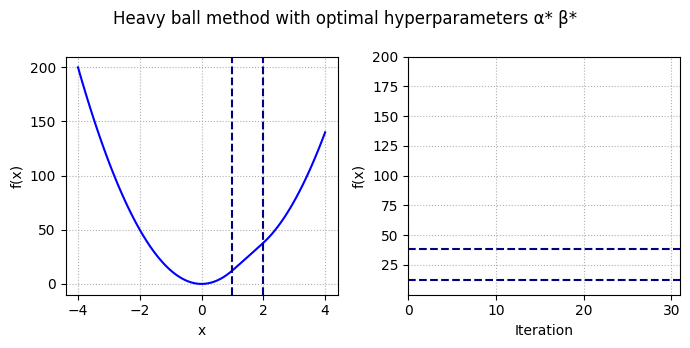

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


# Gradient of the function
def grad_f(x):
    if x < 1:
        return 25 * x
    elif 1 <= x < 2:
        return x + 24
    else:
        return 25 * x - 24

# Heavy Ball method implementation
def heavy_ball_method(alpha, beta, x0, num_iterations):
    x = np.zeros(num_iterations + 1)
    x_prev = x0
    x_curr = x0  # Initialize x[1] same as x[0] to start the algorithm
    for i in range(num_iterations):
        x[i] = x_curr
        x_new = x_curr - alpha * grad_f(x_curr) + beta * (x_curr - x_prev)
        x_prev = x_curr
        x_curr = x_new
    x[num_iterations] = x_curr
    return x

# Parameters
L = 25
mu = 1
alpha_star = 4 / (np.sqrt(L) + np.sqrt(mu))**2
# alpha_star = 2 / L
beta_star = (np.sqrt(L) - np.sqrt(mu))**2 / (np.sqrt(L) + np.sqrt(mu))**2
# beta_star = mu/L
x0 = 3.7  # Initial condition
num_iterations = 30

# Generate the trajectory of the method
trajectory = heavy_ball_method(alpha_star, beta_star, x0, num_iterations)

# Setup the figure and axes for the animation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3.5))
fig.suptitle("Heavy ball method with optimal hyperparameters α* β*")

# Function for updating the animation
def update(i):
    ax1.clear()
    ax2.clear()

    # Plot f(x) and trajectory
    x_vals = np.linspace(-4, 4, 100)
    f_vals = np.piecewise(x_vals, [x_vals < 1, (x_vals >= 1) & (x_vals < 2), x_vals >= 2],
                          [lambda x: 12.5 * x**2, lambda x: .5 * x**2 + 24 * x - 12, lambda x: 12.5 * x**2 - 24 * x + 36])
    ax1.plot(x_vals, f_vals, 'b-')
    ax1.plot(trajectory[:i], [12.5 * x**2 if x < 1 else .5 * x**2 + 24 * x - 12 if x < 2 else 12.5 * x**2 - 24 * x + 36 for x in trajectory[:i]], 'ro-')
    # Add vertical dashed lines at x=1 and x=2 on the left subplot
    ax1.axvline(x=1, color='navy', linestyle='--')
    ax1.axvline(x=2, color='navy', linestyle='--')

    # Plot function value from iteration
    f_trajectory = [None for x in trajectory]
    f_trajectory[:i] = [12.5 * x**2 if x < 1 else .5 * x**2 + 24 * x - 12 if x < 2 else 12.5 * x**2 - 24 * x + 36 for x in trajectory[:i]]
    ax2.plot(range(len(trajectory)), f_trajectory, 'ro-')
    ax2.set_xlim(0, len(trajectory))
    ax2.set_ylim(min(f_vals), max(f_vals))
    # Add horizontal dashed lines at f(1) and f(2) on the right subplot
    f_1 = 12.5 * 1.0**2
    f_2 = .5 * 2.**2 + 24 * 2. - 12
    ax2.axhline(y=f_1, color='navy', linestyle='--')
    ax2.axhline(y=f_2, color='navy', linestyle='--')

    # ax1.set_title("Function f(x) and Trajectory")
    ax1.set_xlabel("x")
    ax1.set_ylabel("f(x)")
    ax1.grid(linestyle=":")

    # ax2.set_title("Function Value from Iteration")
    ax2.set_xlabel("Iteration")
    ax2.set_ylabel("f(x)")
    ax2.grid(linestyle=":")

    plt.tight_layout()

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=num_iterations, repeat=False, interval=100)
HTML(ani.to_jshtml())

In [9]:
# Set up the writer object to save the video
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='@fminxyz'), bitrate=1800)

# Save the animation
ani.save('heavy_ball_conv.mp4', writer=writer, dpi=600)

/var/folders/7m/3rbdnx5n5sz625f3l87m91cc0000gn/T/ipykernel_9206/992538532.py:83: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>